# Projet Calcul Stochastique - Eya SHIlI - Lan Phuong VU - M1 IEF-FA

## Introduction

> "And like all scientists, we too stand on the shoulders of giants, on the selective accumulation of prior knowledge."
Ainsi affirmaient Robert C. Merton et Myron Scholes dans leur discours du prix Nobel d'économie le 10 décembre 1997.

Lauréates du prix Nobel d'économie et contributeurs majeurs au développement des mathématiques financières, Fisher Black (décédé au moment de la valorisation de sa contribution mais crédité par ses collègues), Myron Scholes et Robert Merton se sont inspirés des travaux du mathématicien Louis Bachelier et de l'économiste Paul Samuelson afin de forger le modèle Black-Scholes-Merton que nous allons mettre en application dans le cadre de ce projet.

Il s'agit d'un modèle permettant de pricer des options grâce à la détention de l'actif sous-jacent de celle-ci et du cash. Ce dernier est toutefois limité par les hypothèses suivantes:
1. Le prix de l'actif sous-jacent $S_t$ suit un mouvement brownien.
2. On raisonne dans un contexte où il n'existe pas d'opportunité d'arbitrage.
3. Le temps est une fonction continue.
4. La vente à découvert est autorisée.
5. Il n'existe pas de coûts de transaction.
6. Il existe un taux d'intérêt sans risque connu à l'avance et constant.
7. L'actif sous jacent est divisble.
8. Si l'actif est une action, elle ne verse pas de dividendes entre le moment de l'évaluation de l'option et l'échéance de celle-ci.

Dans le cadre de la mise en place du modèle Black and Scholes, nous avons décidé de baser nos paramètres sur des éléments préexistants. Nous souhaitons expliciter l'application du modèle Black and Scholes sur un portefeuille composé:
- D'un actif sans risque: nous avons choisi une obligation d'état américaine ayant 10 ans de maturité.
- D'un actif risqué: il s'agira de l'action Apple. 

Ces données seront extraites directement de Yahoo Finance. Notons également que nous utiliserons la donnée disponible la plus récente et que sa valeur actualisée vérifie la dynamique suivante:
$$ d\tilde{S}_t = \sigma \tilde{S}_t \, dW_t, \quad t \in [0, T] $$

Nous allons dans un premier temps simuler les trajectoires de l'actif risqué puis concevoir notre portefeuille de réplication discrétisé. Ensuite nous étudierons la sensibilité du prix du call par rapport à ses paramètres. Enfin, nous intégrerons les coûts de transactions, initialement éliminés par les hypothèses du modèle Black and Scholes, dans notre étude.

### Question 1 : Simulation des trajectoires du prix et du prix actualisé de l'actif risqué


Soit $S_0$ le prix initial de l'actif, $r$ le taux d'intérêt sans risque (en continu), $\sigma$ la volatilité de l'actif, et $G_i$ des variables aléatoires indépendantes suivant une loi normale centrée réduite $\mathcal{N}(0,1) $ . De notre dynamique définie précédemment, nous pouvons déduire le schémas d'Euler comme suit:
$$ S_0=S_{t_0}^{j}$$
$$S_{t_i} = S_{t_{i-1}} \left( 1 + \sigma \sqrt{\frac{T}{n}} G_i \right) \cdot e^{r t_i} \Leftrightarrow S_{t_i}^{j} = S_{t_{i-1}}^{j} \left( 1 + \sigma \sqrt{\frac{T}{n}}G_i \right) \cdot e^{r t_i}$$

La simulation des trajectoires est réalisée pour chaque $j$-ème trajectoire ($ j = 1, \dots, N $) et pour chaque pas de temps $i = 1, \dots, n $ par la formule :

On a:
- $t_i$ représente les moments discrets de la simulation, avec $i \in [0, n]$.
- $\sigma$ est la volatilité de l'actif.
- $G_i \sim \mathcal{N}(0, 1) $ est une variable aléatoire de choc.
- $\mu $ est le taux de rendement dans le code, il est implicite par l'effet du taux d'intérêt $r$.

Notons que nous avons présenté la valeur non actualisée.

In [4]:
# Importation des librairies
import numpy as np
import yfinance as yf
from datetime import date, timedelta
import numpy.random as npr
import matplotlib.pyplot as plt
from scipy.stats import norm
from math import sqrt, exp, log


Nous prendront la date disponible la plus récente pour notre extraction. On prendra par défaut la date du jour. Néanmoins, si la date du jour est un samedi ou un dimanche, nous prendons la valeur du dernier vendredi.

In [6]:
# Formatter la date
date=date.today()
if date.weekday() == 5:
    date = date-timedelta(days=1)
elif date.weekday() == 6:
    date = date-timedelta(days=2)
else:
    date = date

In [7]:
# Importation des données historiques des actifs risqués et sans risque dans des data-frame
data_nra = yf.download("^TNX", start="2024-01-01", end=date)
data_ra =  yf.download("AAPL", start="2024-01-01",end=date)
print(data_nra)
print(data_ra)
print(data_ra.columns)
print(data_nra.columns)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2024-01-02  3.946  3.973  3.918  3.969      0
2024-01-03  3.907  4.008  3.894  3.978      0
2024-01-04  3.991  4.006  3.971  3.974      0
2024-01-05  4.042  4.099  3.953  4.038      0
2024-01-08  4.002  4.063  3.966  4.059      0
...           ...    ...    ...    ...    ...
2025-04-25  4.266  4.293  4.251  4.282      0
2025-04-28  4.216  4.295  4.214  4.280      0
2025-04-29  4.173  4.245  4.164  4.227      0
2025-04-30  4.177  4.229  4.135  4.139      0
2025-05-01  4.231  4.241  4.124  4.150      0

[334 rows x 5 columns]
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.532074  187.315366  182.792518  186.033057  82488700
2024-01-03  183.150375  184.770652  182.335262  183.1205

In [11]:
# Définition des paramètres
T = 5 # Horizon de simulation en années (5 ans)        
N = 100 # Nombre de trajectoires à simuler
n = 252*T # Nombre de pas de discrétisation (252 jours ouvrés/an x 5 ans)
pas = T/n # Taille d'un pas de temps (en années)
rp = np.sqrt(pas)
dates = np.linspace(0, T, n+1) # Vecteur temporel de 0 à T avec n+1 points

# Initialisation des prix - Récupération des données réelles
S0 = data_ra.loc[:,( 'Close', 'AAPL')].values[-1] # Dernier prix de clôture AAPL
r = data_nra.loc[:,( 'Close', '^TNX')].values[-1]/100 # Dernier taux des bons du Trésor 10 ans (en %)

# Définition du strike price
k = 0.9
K = S0 * k 
KT = K * np.exp(-r*T)

# Calcul de la volatilité historique
sigma = np.std(data_ra.loc[:,( 'Close', 'AAPL')])/100

# Initialisation des matrices de simulation
S=np.ones((n+1,N))*S0
ST=np.ones((n+1,N))*S0

In [13]:
# Simulation du schémas d'Euler avec la méthode de Monte-Carlo
for j in range(N):
    for i in range(1,n+1):
        Gi = rp*npr.randn()
        ST[i, j] = ST[i-1, j] * (1 + sigma*Gi)
        S[i,j] = ST[i,j]*np.exp(r*dates[i])

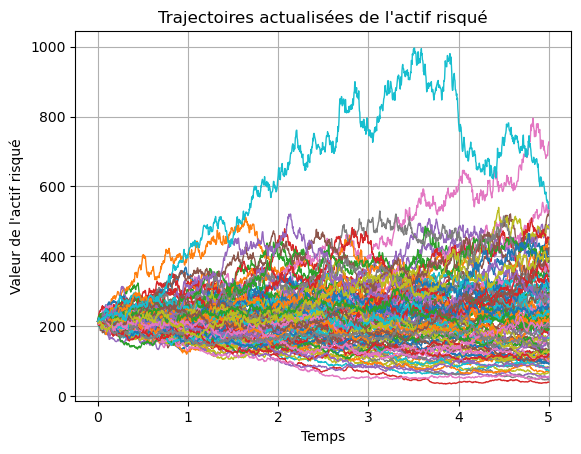

In [15]:
# Graphique des différentes trajetoires actualisées
plt.plot(dates, ST, linewidth=1, markersize=1)  
plt.title("Trajectoires actualisées de l'actif risqué")
plt.xlabel("Temps")
plt.ylabel("Valeur de l'actif risqué")
plt.grid(True)
plt.show()

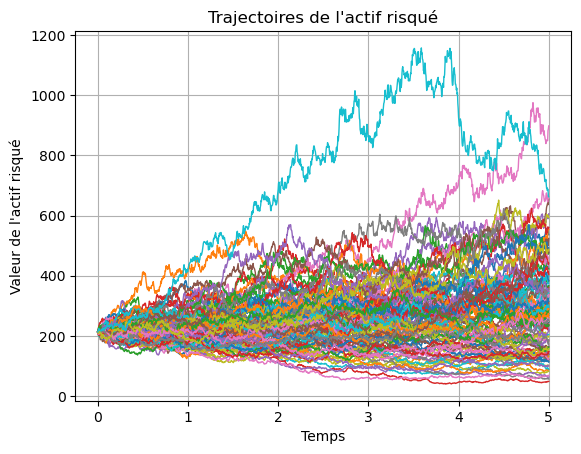

In [17]:
# Graphique des différentes trajetoires
plt.plot(dates, S, linewidth=1, markersize=1)  
plt.title("Trajectoires de l'actif risqué")
plt.xlabel("Temps")
plt.ylabel("Valeur de l'actif risqué")
plt.grid(True)
plt.show()

In [19]:
# Moyenne des trajectoires
mean_S = S.mean(axis=1)

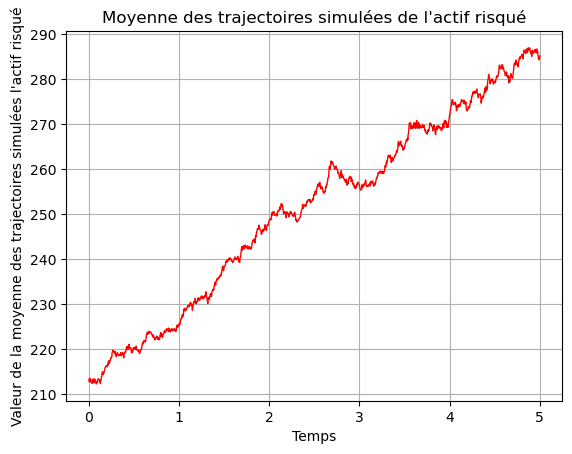

In [21]:
# Graphique de la moyenne des différentes trajetoires
plt.plot(dates, mean_S, color='red', linewidth=1, markersize=1)
plt.title("Moyenne des trajectoires simulées de l'actif risqué")
plt.xlabel("Temps")
plt.ylabel("Valeur de la moyenne des trajectoires simulées l'actif risqué")
plt.grid(True)
plt.show()

### Question 2 : Application de la formule d'Itô au portefeuille actualisé

Le portefeuille actualisé est défini par :

$$
\tilde{V}_t = g(t, \tilde{S}_t)
$$

où la fonction $g(t, x)$ est solution de l'équation de la chaleur suivante :

$$
\frac{\partial g}{\partial t}(t, x) + \frac{\sigma^2 x^2}{2} \frac{\partial^2 g}{\partial x^2}(t, x) = 0
$$

avec condition terminale :

$$
g(T, x) = (x - \tilde{K})^+
$$

On admet que $g$ est deux fois continûment dérivable. On peut alors appliquer la formule d’Itô à une fonction $f(t, X_t)$ de classe $C^2 (\mathbb{R} \times \mathbb{R}_+, \mathbb{R}) $, ce qui donne :

$$
df(t, X_t) = \frac{\partial f}{\partial t}(t, X_t) \, dt + \frac{\partial f}{\partial x}(t, X_t) \, dX_t + \frac{1}{2} \frac{\partial^2 f}{\partial x^2}(t, X_t) \, d[X]_t
$$

En appliquant cette formule à $\tilde{V}_t = g(t, \tilde{S}_t)$, avec :

- $d\tilde{S}_t = \sigma \tilde{S}_t \, dW_t$
- $[\tilde{S}]_t = \sigma^2 \tilde{S}_t^2 \, dt$

on obtient :

$$
d\tilde{V}_t = \frac{\partial g}{\partial t}(t, \tilde{S}_t) \, dt
+ \frac{\partial g}{\partial x}(t, \tilde{S}_t) \, d\tilde{S}_t
+ \frac{1}{2} \frac{\partial^2 g}{\partial x^2}(t, \tilde{S}_t) \, \sigma^2 \tilde{S}_t^2 \, dt
$$

En utilisant le fait que $g$ vérifie l’équation de la chaleur pour $x = \tilde{S}_t$, on a :

$$
\frac{\partial g}{\partial t}(t, \tilde{S}_t) + \frac{\sigma^2 \tilde{S}_t^2}{2} \frac{\partial^2 g}{\partial x^2}(t, \tilde{S}_t) = 0
$$

Cela implique que tous les termes en $dt$ s'annulent, et il reste :

$$
d\tilde{V}_t = \frac{\partial g}{\partial x}(t, \tilde{S}_t) \, d\tilde{S}_t = \theta_t \, d\tilde{S}_t
$$



### Question 3: Portefeuille auto-financé

#### Objectif de la question

Dans cette question, on cherche à démontrer les trois propriétés suivantes :

- Le processus $V_t = e^{rt} \tilde{V}_t$ est un portefeuille **autofinancé**.
- Il **réplique le call européen**. 
- Il est **unique**.

---

#### (i) Le portefeuille est autofinancé

Pour qu’un portefeuille soit **autofinancé**, sa variation de valeur doit dépendre uniquement de la variation des actifs détenus (dans notre cas, l’actif risqué), sans aucun apport ou retrait de capital extérieur.

Or, d’après la question précédente, on a déjà :

$$
d\tilde{V}_t = \theta_t \, d\tilde{S}_t
$$

Ce qui est précisément la condition d’autofinancement.

Le portefeuille est composé de l’actif risqué et de l’actif sans risque. Sa valeur à l’instant \( t \) s’écrit :

$$
V_t = \theta_t S_t + \gamma_t S_t^0
$$

où :
- $\theta_t$ est le nombre d’unités de l’actif risqué,
- $\gamma_t$ est le nombre d’unités de l’actif sans risque.

En actualisant les deux côtés :

$$
\tilde{V}_t = \theta_t \tilde{S}_t + \gamma_t \tilde{S}_t^0
$$

Sachant que $S_t^0 = e^{rt}$, on a $\tilde{S}_t^0 = 1$. Donc :

$$
\tilde{V}_t = \theta_t \tilde{S}_t + \gamma_t
$$

En dérivant cette expression :

$$
d\tilde{V}_t = \theta_t \, d\tilde{S}_t
$$

Ce qui confirme que l’actif sans risque, une fois actualisé, ne contribue pas à la variation du portefeuille.

**Conclusion** : Le portefeuille est bien **autofinancé**.

---

#### (ii) Le portefeuille réplique le call européen

À maturité $T$, la valeur du portefeuille est :

$$
V_T = e^{rT} \tilde{V}_T = e^{rT} (\tilde{S}_T - \tilde{K})^+ = (S_T - K)^+
$$

Ce résultat correspond exactement au **payoff d’un call européen** de strike $K$.

**Conclusion** : Le portefeuille **réplique** le call.

---

#### (iii) Le portefeuille est unique

Dans le modèle de **Black-Scholes**, le marché est dit **parfait**, c’est-à-dire qu’il respecte deux propriétés fondamentales :

1. **Absence d’arbitrage** : on ne peut pas générer de profit sans risque.
2. **Marché complet** : tout produit dérivé peut être **exactement répliqué** à l’aide d’une stratégie dynamique sur les actifs sous-jacents.

Nous avons construit un portefeuille autofinancé $V_t$ tel que :

$$
V_T = (S_T - K)^+
$$

C’est le payoff exact d’un call européen à maturité. Dans un marché complet, il **n’existe qu’une seule stratégie autofinancée** qui permet de répliquer un tel payoff.

**Conclusion** : Le portefeuille est donc **unique**.

---



### Question 4: Discrétisation du portefeuille actualisé 

Dans la réalité, il est **impossible d’ajuster en continu** la stratégie de réplication.  
Il est donc nécessaire de **discrétiser** la stratégie afin de pouvoir la mettre en œuvre numériquement.

L’objectif de cette question est de construire une **approximation numérique** du portefeuille autofinancé défini précédemment par :

$$
d\tilde{V}_t = \theta_t \, d\tilde{S}_t
$$

sur l’intervalle $[0, T]$, découpé en $N$ pas de temps :

$$
t_0 = 0 < t_1 < t_2 < \dots < t_N = T
$$

#### Dynamique discrète du portefeuille

Dans ce cadre discret, l’évolution du portefeuille s’écrit :

$$
\Delta \tilde{V}_{t_i} = \theta_{t_{i-1}} \, \Delta \tilde{S}_{t_i}
$$

Cela signifie que la stratégie à l’instant $t_{i-1}$ est maintenue fixe jusqu’à $t_i$.

---

#### Algorithme de discrétisation

L’algorithme complet s’écrit comme suit :

- **Initialisation** :  
  $$
  \tilde{V}_0 = g(0, \tilde{S}_0) = g(0, S_0)  
  $$  
  (car $\tilde{S}_0 = S_0 e^{-r \cdot 0} = S_0$)

- **Pour chaque pas de temps $i = 0$ à $N-1$** :

  $$
  \theta_{t_i} = \frac{\partial g}{\partial x}(t_i, \tilde{S}_{t_i}) = g_x(t_i, \tilde{S}_{t_i})
  $$

  $$
  \tilde{V}_{t_{i+1}} = \tilde{V}_{t_i} + \theta_{t_i} \left( \tilde{S}_{t_{i+1}} - \tilde{S}_{t_i} \right)
  $$

---

#### Forme compacte de la valeur terminale

Par récurrence, on obtient la valeur du portefeuille à maturité :

$$
\tilde{V}_{t_N} = \underbrace{\tilde{V}_0}_{\text{Valeur initiale}} + \underbrace{\sum_{i=1}^{N} \Delta \tilde{V}_{t_i}}_{\text{Accumulation des gains}}
$$

Cette approche permet de simuler numériquement la stratégie de réplication dans un environnement réaliste, où les ajustements sont faits à fréquence discrète.



### Question 5: Simulation des trajectoires du portefeuille et du portefeuille actualisé

On commence par une brève explication du modèle utilisé.  
L’objectif est de répliquer le modèle **réel** de Black-Scholes, mais en travaillant directement avec les **prix actualisés** des actifs.

---

#### Définition de la fonction $g(t, x)$

On considère la fonction $g(t, x)$, où $x$ représente le **prix actualisé** de l’actif risqué, soit $\tilde{S}_t = e^{-rt} S_t$.

---

#### À maturité $t = T$ 

Le payoff actualisé du Call est :

$$
g(T, x) = (x - \tilde{K})^+
$$

où $\tilde{K} = K e^{-rT}$ est le **strike actualisé**. 

En effet, à $t = T$, on a :  
$$
e^{-rT} (S_T - K)^+ = (e^{-rT} S_T - e^{-rT}K)^+ = (\tilde{S}_T - \tilde{K})^+
$$

---

#### Formule générale pour $g(t, x)$

La formule donnée dans l’énoncé est :

$$
g(t, x) = x \, \Phi(d(t, x, \sigma)) - K \, \Phi(d(t, x, \sigma) - \sigma \sqrt{T - t})
$$

avec :

$$
d(t, x, \sigma) = \frac{1}{\sigma \sqrt{T - t}} \ln\left( \frac{x}{K} \right) + \frac{1}{2} \sigma \sqrt{T - t}
$$

Dans cette formule, le $K$ utilisé correspond en réalité au **strike actualisé** $\tilde{K}$, conformément à notre approche.

---

#### Passage de $\tilde{S}_t$ à $S_t$

Posons $x = \tilde{S}_t = e^{-rt} S_t$, et $\tilde{K} = e^{-rT} K$.  
Alors :

$$
d(t, \tilde{S}_t, \sigma) 
= \frac{1}{\sigma \sqrt{T - t}} \ln\left( \frac{\tilde{S}_t}{\tilde{K}} \right) + \frac{1}{2} \sigma \sqrt{T - t}
= \frac{1}{\sigma \sqrt{T - t}} \left( \ln\left( \frac{S_t}{K} \right) + r(T - t) \right) + \frac{1}{2} \sigma \sqrt{T - t}
$$

On reconnaît alors :

$$
d(t, \tilde{S}_t, \sigma) = \frac{ \ln\left( \frac{S_t}{K} \right) + \left( r + \frac{\sigma^2}{2} \right)(T - t) }{ \sigma \sqrt{T - t} } = d_1
$$

et donc :

$$
d(t, \tilde{S}_t, \sigma) - \sigma \sqrt{T - t} = d_2
$$

---

#### Conclusion

En remplaçant dans la formule de $g(t, x)$, on obtient :

$$
g(t, \tilde{S}_t) = \tilde{S}_t \, \Phi(d_1) - \tilde{K} \, \Phi(d_2)
$$

Ce qui correspond exactement au **prix actualisé** d’un Call Européen.

---

In [24]:
# Fonction pour calculer d(t, x, sigma)
def d(t, x, sigma, r, k, T, S0):
    if T - t <= 0:
        return 0
    return (1/(sigma * np.sqrt(T - t))) * np.log(x/((S0 * k) * np.exp(-r * T)))+ 0.5 * sigma * np.sqrt(T - t)

# Fonction pour calculer g(t, x, sigma)
def g(t, x, sigma, r, k, T, S0):
    d1 = d(t, x, sigma, r, k, T, S0)
    d2 = d1 - sigma * np.sqrt(T - t)
    return x * norm.cdf(d1) - (S0 * k) * np.exp(-r * T) * norm.cdf(d2)

# Fonction pour calculer g_x(t, x, sigma)
def g_x(t, x, sigma, r, k, T, S0):
    return norm.cdf(d(t, x, sigma, r, k, T, S0))

In [26]:
# Initialisation des matrices de portefeuille
VT = np.zeros((n+1, N))  # Portefeuille actualisé
V = np.zeros((n+1, N))   # Portefeuille non actualisé
theta = np.zeros((n+1, N))  # Positions sur l'actif risqué

# Prix initial du Call dans BS actualisé
VT[0, :] = g(0, S0, sigma, r, k, T, S0)
V[0, :] = VT[0, :]  # À t = 0, l'actualisation n'a pas d'effet

 # Simulation du portefeuille de couverture
for j in range(N):
        for i in range(1, n+1):
            # Calcul de la position theta au temps précédent
            theta[i-1, j] = g_x(dates[i-1], ST[i-1, j], sigma, r, k, T, S0)

            # Mise à jour de VT en utilisant la propriété d'autofinancement
            delta_ST = ST[i, j] - ST[i-1, j]
            VT[i, j] = VT[i-1, j] + theta[i-1, j] * delta_ST

             # Calcul du portefeuille non actualisé
            V[i, j] = VT[i, j] * np.exp(r * dates[i])

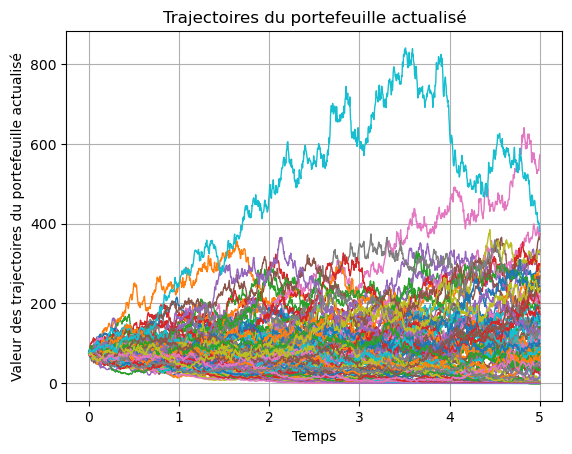

In [27]:
# Graphique des trajectoires du portefeuille actualisé
plt.plot(dates, VT, linewidth = 1, markersize = 1)
plt.title("Trajectoires du portefeuille actualisé")
plt.xlabel("Temps")
plt.ylabel("Valeur des trajectoires du portefeuille actualisé")
plt.grid(True)
plt.show()

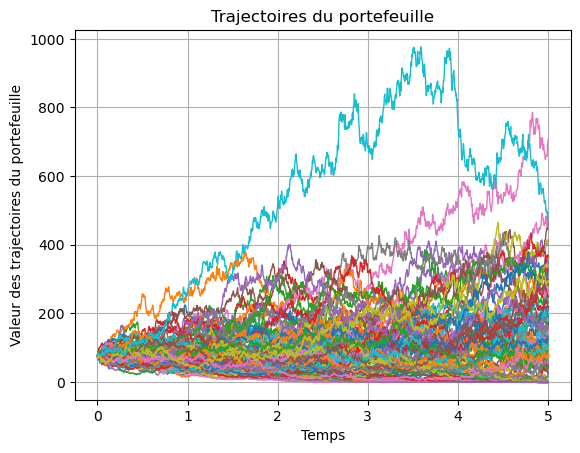

In [28]:
# Graphique des trajectoires du portefeuille
plt.plot(dates, V, linewidth = 1, markersize = 1)
plt.title("Trajectoires du portefeuille")
plt.xlabel("Temps")
plt.ylabel("Valeur des trajectoires du portefeuille")
plt.grid(True)
plt.show()

### Question 6: L'histogramme des différences simulées

Nous pouvons déduire l'histogramme des différences simulées comme suit:

In [34]:
# Différences
D = np.zeros(N)
for j in range(N):
    D[j] = V[-1, j] - max((S[-1, j] - K), 0)

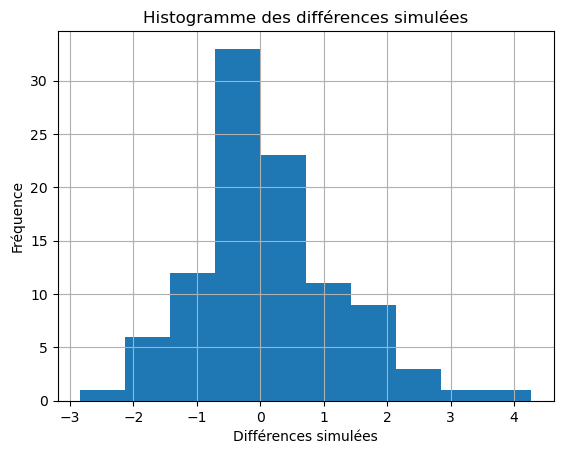

In [36]:
# Histogramme des différences simulées
plt.hist(D)
plt.title("Histogramme des différences simulées")
plt.xlabel("Différences simulées")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

In [38]:
print(f"L'erreur moyenne du portefeuille de réplication est de {np.mean(D):.4f} ± {np.std(D):.4f}")

L'erreur moyenne du portefeuille de réplication est de 0.1430 ± 1.1303


L'historgramme est bien centré autour de 0. Notre réplication est donc correcte.

### Question 7:  Étude des sensibilités du Call dans le modèle Black and Scholes

Dans cette partie nous allons étudier la sensibilité d'un call européen par rapport à ses paramètres dans le modèle Black and Scholes classique.

Afin de poser un cadre d'étude clair, nous allons voir comment évolue la sensibilité de notre call par rapport aux valeurs que peuvent prendre nos paramètres.

Une sensibilité est une dérivée, ainsi nous allons approximer les sensibilités par rapport à chaque paramètre en appliquant le formules des greeks que nous avons étudiées en cours. Il s'agirait de récupérer les dérivées premières de la formule de valorisation du call par rapport au paramètre considéré.

In [ ]:
# Fonction pour calculer le prix du Call Européen dans le modèle de Black-Scholes
def call_pricer(T, t, S, K, r, sigma):
    d1 = (log(S / K) + (r + sigma**2 / 2) * (T - t)) / (sigma * sqrt(T - t))
    d2 = (log(S / K) + (r - sigma**2 / 2) * (T - t)) / (sigma * sqrt(T - t))
    call = S * norm.cdf(d1) - K * exp(-r * (T - t)) * norm.cdf(d2)
    return d1,d2,call 


La sensibilité du prix du call par rapport au prix du delta est modélisée par le delta:
$$\delta = \mathcal{N}(d1) $$

In [ ]:
# 1. Sensibilité de la valeur du call par rapport au prix du sous jacent: le delta
S0_sensi = np.linspace(1, S0, n+1)
d1_cr = np.ones(n+1)
sensi_cr = np.ones(n+1)


for i in range(n+1):
    d1_cr[i],_,_ = call_pricer(T, pas, S0_sensi[i], K, r, sigma)

def delta(d1):
    return norm.cdf(d1)

for i in range(n+1):
    sensi_cr[i] = delta(d1_cr[i])


plt.plot(S0_sensi,sensi_cr)
plt.title("Sensilité de la sensibilité du call par rapport au taux d'intérêt")
plt.xlabel("Variation de la valeur du taux d'intérêt")
plt.ylabel("Variation de la sensibilité du call")
plt.grid(True)
plt.show()

La sensibilité du prix du call croit positivement avec la variation du prix du sous jacent.

In [ ]:
d1,_,_ = call_pricer(T, pas, S0, K, r, sigma)
print("La sensibilité du prix du call avec la valeur prédéfinie de l'actif sous jacent est telle que:" ,delta (d1))

Le vega est la sensibilité du call par rapport à la volatilité et est défini tel que:
$$
\text{Vega} = \frac{\partial C}{\partial \sigma} = S_t \cdot \phi(d_1) \cdot \sqrt{T - t}
$$

In [ ]:
# 2. Sensibilité de la valeur du call par rapport à la volatilité: le vega
sigma_sensi = np.linspace(0.001, sigma, n+1)
d1_ce = np.zeros(n+1)
sensi_ce= np.zeros(n+1)

def vega(d1,T,t):
    return S0*norm.pdf(d1)*np.sqrt(T-t)

for i in range(n+1):
    d1_ce[i],_,_ = call_pricer(T, pas, S0, K, r, sigma_sensi[i])

for i in range(n+1):
    sensi_ce[i] = vega(d1_ce[i],T,pas)
    
plt.plot(sigma_sensi,sensi_ce)
plt.title("Sensilité de la sensibilité du call par rapport à la volatilité")
plt.xlabel("Variation de la valeur de l'écart-type")
plt.ylabel("Variation de la sensibilité du call")
plt.grid(True)
plt.show()

Quand la valeur de l'écart type augmente, la sensibilité du call augmente également mais nous voyons que la croissance de la sensibilité commence à diminuer vers la fin.

In [ ]:
d1,_,_=call_pricer(T, pas, S0, K, r, sigma)
print("Quand la volatilité de l'actif sous jacent varie de 1%, la valeur du call varie de " ,vega (d1,T,pas)*0.01)

Le rho correspond à la sensibilité du prix du call par rapport au taux d'intérêt est défini tel que:

$$
\text{Rho} = \frac{\partial C}{\partial r} = K (T - t) e^{-r(T - t)} N(d_2)
$$



In [ ]:
# 3. Sensibilité de la valeur du call par rapport au taux d'intérêt: le rho
r_sensi = np.linspace(0, r, n+1)
sensi_cr = np.zeros(n+1)
d2_cr = np.zeros(n+1)

for i in range(n+1):
    _,d2_cr[i],_ = call_pricer(T, pas, S0, K, r_sensi[i], sigma)

def rho(d2,r,T,t):
    return T*K*np.exp(-r*(T-t))*norm.cdf(d2)

for i in range(n+1):
    sensi_cr[i] = rho(d2_cr[i],r_sensi[i],T,pas)

plt.plot(r_sensi,sensi_cr)
plt.title("Sensilité de la valeur du call par rapport au strike")
plt.xlabel("Variation de la valeur du taux d'intérêt")
plt.ylabel("Variation de la sensibilité du call")
plt.grid(True)
plt.show()

La sensibilité du prix du call croit positivement avec la variation du taux d'intérêt.

In [ ]:
_,d2,_ = call_pricer(T, pas, S0, K, r, sigma)
print("Quand le taux d'intérêt varie de 1%, la valeur du call varie de " ,rho (d2,r,T,pas)*0.01)

Le Theta correspond à la sensilité de la valeur du call par rapport au temps:
$$
\text{Theta} = \frac{\partial C}{\partial t} = -\frac{S_t \cdot \phi(d_1) \cdot \sigma}{2\sqrt{T - t}} - r K e^{-r(T - t)} N(d_2)
$$


In [ ]:
# 4. Sensibilité de la valeur du call par rapport au temps: le Théta
def theta(S,t,d1,sigma,T,r,K,d2):
    return -S*norm.pdf(d1)*(sigma/2*np.sqrt(T-t))-r*K*np.exp(-r*(T-t))*norm.cdf(d2)

d1,d2,_ = call_pricer(T, pas, S0, K, r, sigma)
print("Pour chaque jour qui passe, la valeur du call varie de " ,theta (S0,pas,d1,T,r,K,d2,sigma)/252)

Intuitivement, plus le temps passe, plus la valeur du call diminue: le thêta mesure la sensibilité du prix d’une option à l’écoulement du temps. Il s'agit de la perte de valeur par jour à cause du passage du temps, toutes choses égales par ailleurs. Sachant qu'une option a de la valeur temps, à mesure que l’échéance approche, il reste moins de temps pour que l’option devienne profitable donc la valeur du call diminue avec le temps.

## Modèle avec coûts de transactions

Dans cette partie, nous introduisons des **coûts de transactions** dans le cadre du modèle de Black-Scholes. On suppose que :

- Le **taux sans risque est nul** : $r = 0$
- Le portefeuille reste **auto-financé**, mais sa dynamique est modifiée par l'ajout de coûts à chaque réajustement de la stratégie.

La dynamique du portefeuille $V$ (ici $\tilde{V} = V$ car $r = 0$) à chaque pas de temps $t_i^n$ devient :

$$
\Delta V_{t_i^n} = \theta_{t_{i-1}^n} \Delta S_{t_i^n} - \gamma S_{t_i^n} \left| \theta_{t_i^n} - \theta_{t_{i-1}^n} \right|
$$

avec $\gamma > 0$ et $i = 1, 2, ..., n$

### Question 8: Le sens du dernier terme dans la dynamique

D’après la question 4, dans le modèle sans coûts de transaction, la dynamique discrète du portefeuille actualisé s’écrit :

$$
\Delta \tilde{V}_{t_i} = \theta_{t_{i-1}} \Delta \tilde{S}_{t_i}
$$

En valeurs réelles (non actualisées), cette relation devient :

$$
\Delta V_{t_i} = \theta_{t_{i-1}} \Delta S_{t_i}
$$

Dans cette formule, on peut interpréter $\theta_{t_{i-1}}$ comme la position dans l'actif risqué à l'instant $t-1$. Autrement dit, la variation de valeur d'un portefeuille auto-financé vient de la variation du prix de l'actif risqué. 

---
#### Retour à la formule avec coûts de transaction

Comparons la formule avec coûts de transaction à celle d’un portefeuille auto-financé sans coûts. La seule différence réside dans le terme suivant :

$$
- \gamma S_{t_i^n} \left| \theta_{t_i^n} - \theta_{t_{i-1}^n} \right|
$$ 

Ce terme se décompose comme suit :

- $\gamma$ : taux de coût de transaction.
- $\theta_{t_{i-1}}$ : position dans l’actif risqué **avant** rebalancement à la date $t_i$.
- $\theta_{t_i}$ : position **après** rebalancement à la même date.

La quantité $\left| \theta_{t_i^n} - \theta_{t_{i-1}^n} \right|$ correspond donc au **volume d’actif risqué échangé** (en nombre d’unités), c’est-à-dire ce que l’on achète ou vend à l’instant $t_i$.

En conséquence, le terme :

$$
\gamma S_{t_i^n} |\theta_{t_i^n} - \theta_{t_{i-1}^n}|
$$

représente la **perte financière** subie à l'instant $t_i$ à cause du réaujustement du portefeuille. Cette perte dépend :

- du **prix de l’actif risqué** à l’instant $t_i$,
- de l’**ampleur du changement de position**.

Ainsi, plus le rééquilibrage est important, plus le coût de transaction est élevé. Cela traduit une réalité des marchés : chaque opération de trading engendre un coût, qu’il provienne de **commissions**, ou de l’**impact de marché**.

Pour prendre en compte cette perte dans le modèle de pricing, on ajuste la volatilité en introduisant une **volatilité corrigée** $\hat{\sigma}^2$ :

$$
\hat{\sigma}^2 = \sigma^2 (1 + c)
$$

où :
- $\sigma^2$ est la volatilité du modèle de Black-Scholes sans coûts,
- $c > 0$ est un paramètre calibré empiriquement.

L’objectif est que la stratégie de réplication, **même en présence de coûts de transaction**, parvienne à reproduire (ou sur-répliquer légèrement) le payoff du call européen à maturité.

---


### Question 9: Expérimentation numérique

L'objectif de cette question est de déterminer la plus petite valeur de $c > 0$ permettant au portefeuille modifié de répliquer approximativement un Call européen par expérimentation numérique.

Dans notre étude, nous procédons comme suit :
- Nous sélectionnons **10 valeurs de $\gamma$** pour une analyse détaillée.
- Pour chaque $\gamma$, nous testons **100 valeurs différentes de $c > 0$**, comprises dans l'intervalle $[10^{-10}, 0.05]$.

Pour chaque valeur de $\gamma$, la fenêtre des résultats affiche les informations suivantes pour chaque $c$ testé :
- Les différentes valeurs de $c$ testées
- Prix initial théorique de l'option $V_0$ : Le prix théorique de l'option au temps $t = 0$, calculé avec la volatilité ajustée correspondante. 
- Delta initial de l'option $theta\_adjust$ : La position initiale dans l'actif risqué, correspondant au delta de l'option.
- Position initiale en cash $ni$ : La quantité initiale de liquidités non investies dans l'actif sous-jacent.
- Erreur moyenne de réplication :  L'erreur moyenne entre la valeur finale du portefeuille $V\_final$ et le payoff de l'option $payoff$, calculée sur toutes les trajectoires simulées.

Ensuite, nous choisissons le meilleur $c$ en nous basant sur deux critères :
1. Minimisation de l'erreur moyenne de réplication : Le $c$ sélectionné doit minimiser l'erreur moyenne de réplication, c'est-à-dire avoir la plus petite valeur de $mean\_error$ en **valeur absolue**.
2. Plus petit $c > 0$ possible : Parmi les $c$ qui minimisent l'erreur moyenne, nous choisissons le plus petit $c$ strictement supérieur à 0.

Finalement, un résumé final pour chaque $\gamma$ est affiché :
- Le meilleur $c > 0$ sélectionné pour ce $\gamma$
- Le prix de l'option avec coûts de transaction (calculé avec la volatilité ajustée)
- Le prix de l'option sans coûts de transaction (calculé avec la volatilité initial)
- La différence entre ces deux prix


In [ ]:
# Plages de valeurs pour les coûts de transaction
gamma_values = np.linspace(10**(-10), 1e-3, 10) # Valeurs sélectionnées pour une étude détaillée
c_values = np.linspace(10**(-100), 0.05, 100) # Valeurs de c pour l'optimisation

# Initialisation 
sigma_ajust = np.zeros(len(c_values)) # Sigma ajustée
results = []  # Pour stocker les valeurs d'erreur et de coût

# Prix théorique de l'option sans coûts de transaction (gamma = 0, c = 0)
call_price_no_costs = g(0, S0, sigma, 0, k, T, S0)

# Étude pour chaque gamma
for gamma in gamma_values:
    print(f"\n=== Étude détaillée pour gamma = {gamma} ===")
    values = []

    # Tester différentes valeurs de c
    for i in range(100):
        
        sigma_ajust[i] = np.sqrt(sigma**2 * (1 + c_values[i])) # Calcul de la volatilité ajustée
        V0 = g(0, S0, sigma_ajust[i], 0, k, T, S0)  # Prix théorique avec sigma ajustée
        theta_ajust = g_x(0, S0, sigma_ajust[i], 0, k, T, S0)
        ni = V0 - theta_ajust * S0  # Cash initial (non investi dans le sous-jacent)

        erreurs = []  # Stockage des erreurs pour chaque trajectoir
        
        for j in range(N):
            theta_l = theta_ajust  # Position initiale
            ni_l= ni # Valeur initiale du cash
            for t in range(1, n+1):
                theta_ajust_n = g_x(dates[t], ST[t, j], sigma_ajust[i], 0, k, T, S0) # Position ajustée
                var_theta = theta_ajust_n - theta_l # Variation de la position sur l'actif risqué
                cout = gamma * abs(var_theta) * ST[t, j] # Coût de transaction
                ni_l = ni_l-(var_theta * ST[t, j] + cout) # Mise à jour de la valeur du cash
                theta_l = theta_ajust_n # Mise à jour de la position sur l'actif risqué

        V_final = theta_l * ST[n, j] + ni_l  # Valeur finale du portefeuille
        payoff = max(ST[n, j] - K, 0)  # Payoff du call
        erreur = V_final - payoff  # Erreur de réplication
        erreurs.append(erreur)

        mean_error = np.mean(erreurs)
        values.append((mean_error, c_values[i], gamma))

        print(f"c = {c_values[i]:.6f} : prix théorique = {V0:.4f}, position initial = {theta_ajust:.4f}, cash initial = {ni:.4f}, erreur = {mean_error:.4f}")

    # Optimisation 
    sorted_values = sorted(values, key=lambda x: (abs(x[0]), x[1]))  # Trier par erreur puis par c
    filtered_values = [v for v in sorted_values if v[1] > 0]  # Filtrer pour c > 0
    best_index = 0  
    best_c = filtered_values[best_index][1]
    
    print(f"\nPlus petit c > 0 pour gamma = {gamma} avec l'erreur la plus petite |mean_error| est: {best_c}")

    sigma_adj_best = np.sqrt(sigma**2 * (1 + best_c))
    call_price_with_costs = g(0, S0, sigma_adj_best, r, k, T, S0)  
        
    results.append((gamma, best_c, call_price_with_costs))

# Résumé final
print("\n=== Résumé final ===")
for gamma, best_c, call_price_with_costs in results:
    print(f"Gamma : {gamma:.6f}, Meilleur c : {best_c}, "
          f"Prix avec coûts : {call_price_with_costs:.4f}, "
          f"Prix sans coûts : {call_price_no_costs:.4f}, "
          f"Différence : {call_price_with_costs - call_price_no_costs:.4f}")


=== Étude détaillée pour gamma = 1e-10 ===
c = 0.000000 : prix théorique = 55.9113, position initial = 0.6800, cash initial = -89.1459, erreur = -0.2103
c = 0.000505 : prix théorique = 55.9220, position initial = 0.6800, cash initial = -89.1368, erreur = -0.2078
c = 0.001010 : prix théorique = 55.9328, position initial = 0.6800, cash initial = -89.1278, erreur = -0.2053
c = 0.001515 : prix théorique = 55.9435, position initial = 0.6800, cash initial = -89.1188, erreur = -0.2028
c = 0.002020 : prix théorique = 55.9542, position initial = 0.6800, cash initial = -89.1099, erreur = -0.2002
c = 0.002525 : prix théorique = 55.9649, position initial = 0.6800, cash initial = -89.1009, erreur = -0.1977
c = 0.003030 : prix théorique = 55.9757, position initial = 0.6800, cash initial = -89.0919, erreur = -0.1952
c = 0.003535 : prix théorique = 55.9864, position initial = 0.6801, cash initial = -89.0829, erreur = -0.1927
c = 0.004040 : prix théorique = 55.9971, position initial = 0.6801, cash ini

## Conclusion

Pour conclure, nous avons dans un premier temps simulé des trajectoires de l’actif risqué dans le cadre du modèle de Black-Scholes, avant de représenter le prix d’un Call européen à l’aide de la solution de l’équation de la chaleur. L’application du lemme d’Itô nous a permis de retrouver la stratégie de réplication exacte du portefeuille autofinancé, que nous avons ensuite discrétisée. Une étude des erreurs de réplication a montré, via l’histogramme des différences terminales, que notre stratégie reproduit efficacement le payoff de l’option, les erreurs étant centrées autour de zéro. 

Nous avons également analysé l’évolution des sensibilités dans le cadre du modèle classique, avant d’introduire une extension importante prenant en compte des coûts de transaction.

Ce travail met en évidence la richesse du modèle de Black-Scholes, mais aussi ses limites : ses hypothèses simplificatrices, notamment l’absence de coûts de transaction et la volatilité constante, réduisent la capacité du modèle à capturer certaines dynamiques observées en pratique. 

L’introduction de coûts de transaction modifie remarquablement la valeur du portefeuille et, par conséquent, le prix de l’option.

Pour remédier à ces limites, plusieurs extensions ont été proposées dans la littérature. L’une des plus utiles est le celle de Heston, qui introduit une volatilité stochastique permettant de mieux reproduire les sourires de volatilité observés sur les marchés, offrant ainsi une modélisation plus réaliste des prix d’options.